In [0]:
import numpy as np

In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Custom function for print a sentence
def goodPrint(a):
    x = ""
    for i in range(len(a)):
        x += a[i]+" "
    return x

## Downloading nltk corpus

In [120]:
import nltk
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

In [0]:
from nltk.corpus import cess_esp

tagged_sentences = cess_esp.tagged_sents()

## We get a corpus with sentences and the tag for each word

In [122]:
print(tagged_sentences[0])
print("==========================")
print("Tagged sentences: ", len(tagged_sentences))
print("Tagged words:", len(cess_esp.tagged_words()))

[('El', 'da0ms0'), ('grupo', 'ncms000'), ('estatal', 'aq0cs0'), ('Electricité_de_France', 'np00000'), ('-Fpa-', 'Fpa'), ('EDF', 'np00000'), ('-Fpt-', 'Fpt'), ('anunció', 'vmis3s0'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da0fs0'), ('compra', 'ncfs000'), ('del', 'spcms'), ('51_por_ciento', 'Zp'), ('de', 'sps00'), ('la', 'da0fs0'), ('empresa', 'ncfs000'), ('mexicana', 'aq0fs0'), ('Electricidad_Águila_de_Altamira', 'np00000'), ('-Fpa-', 'Fpa'), ('EAA', 'np00000'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq0fsp'), ('por', 'sps00'), ('el', 'da0ms0'), ('japonés', 'aq0ms0'), ('Mitsubishi_Corporation', 'np00000'), ('para', 'sps00'), ('poner_en_marcha', 'vmn0000'), ('una', 'di0fs0'), ('central', 'ncfs000'), ('de', 'sps00'), ('gas', 'ncms000'), ('de', 'sps00'), ('495', 'Z'), ('megavatios', 'ncmp000'), ('.', 'Fp')]
Tagged sentences:  6030
Tagged words: 192685


## Splitting Sentence and tag inside two different arrays, later write 2 files for the 2 arrays

In [123]:
import numpy as np
import pickle

sentences, tagss = [], []
for tagged_sentence in tagged_sentences:
    sentence, tags = zip(*tagged_sentence)
    sentences.append(np.array(sentence))
    tagss.append(np.array(tags))
    
# with open("sentences.txt", "wb") as fp:
#     pickle.dump(sentences, fp)
    
# with open("tags.txt", "wb") as fp:
#     pickle.dump(tagss, fp)
print(sentences)
print(tagss)

[array(['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF',
       '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra',
       'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana',
       'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',',
       'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para',
       'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495',
       'megavatios', '.'], dtype='<U31'), array(['Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el',
       'proyecto', 'para', 'la', 'construcción', 'de', 'Altamira_2', ',',
       'al', 'norte', 'de', 'Tampico', ',', 'prevé', 'la', 'utilización',
       'de', 'gas', 'natural', 'como', 'combustible', 'principal', 'en',
       'una', 'central', 'de', 'ciclo', 'combinado', 'que', 'debe',
       'empezar', 'a', 'funcionar', 'en', 'mayo_del_2002', '.'],
      dtype='<U13'), array(['La', 'electricidad', 'producida', 'pasará', 'a', 'la', 'red',
       'el

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Printing a sample of the arrays

In [0]:
# print(str(len(sentences)) + "\n")
# print("Words on the first sentence: "+str(len(sentences[0])))+"\n"
# print(goodPrint(sentences[0])+ "\n")
# print("tags of the first sentence: "+str(len(tagss[0])))+"\n"
# print(tagss[0])

## Percentages for training and testing

In [0]:
from sklearn.model_selection import train_test_split
 
(training_sentences, 
 test_sentences, 
 training_tags, 
 test_tags) = train_test_split(sentences, tagss, test_size=0.2)

(train_sentences, 
 eval_sentences, 
 train_tags, 
 eval_tags) = train_test_split(training_sentences, training_tags, test_size=0.25)

In [126]:
print("training_sentences:" + str(len(training_sentences)))
print("train_sentences: " + str(len(train_sentences)))
print("test_sentences: " + str(len(test_sentences)))
print("eval_sentences: " + str(len(eval_sentences)) + "\n")

print(train_sentences[0])
print(test_sentences[0])
print(eval_sentences[0])

print("\ntraining_tags:" + str(len(training_sentences)))
print("train_tags: " + str(len(train_tags)))
print("test_tags: " + str(len(test_tags)))
print("eval_tags: " + str(len(eval_tags)) + "\n")

print(train_tags[0])
print(test_tags[0])
print(eval_tags[0])

print(len(train_sentences[0]), len(train_sentences[1]), len(train_sentences[2]))

training_sentences:4824
train_sentences: 3618
test_sentences: 1206
eval_sentences: 1206

['Suponen' 'los' 'primeros' '-Fpa-' 'a' '-Fpt-' 'el' 'empleo' 'de'
 'polímeros' 'derivados' 'de' 'acetileno' 'o' 'heterociclos' 'a' 'los'
 'que' 'se' 'somete' 'a' '-' 'dopado' '-' '.']
['A_pesar_de_que' ',' 'año' 'y' 'medio' 'atrás' ',' 'al' 'descubrirlo' ','
 '*0*' 'habían' 'incluso' 'dudado' 'de' 'si' '*0*' 'era' '*0*' 'creo'
 'que' 'abuelo' 'de' '*0*' 'no' 'sé' 'qué' 'señora' 'que' 'decía' 'que'
 '*0*' 'lo' 'había' 'perdido' 'por' 'ahí' '.']
['-' 'Aquí' ',' 'cada' 'cual' 'viene' 'a' 'su' 'vaina' ':' 'uno' 'a'
 'fabrical' 'panderetas' ',' 'otro' 'a' 'sonal' 'el' 'guairo' ',' 'otros'
 'a' 'hasel' '-' 'street_art' '-' '-Fpa-' 'arte' 'callejero' '-Fpt-' '-'
 '.']

training_tags:4824
train_tags: 3618
test_tags: 1206
eval_tags: 1206

['vmip3p0' 'da0mp0' 'ao0mp0' 'Fpa' 'nc00000' 'Fpt' 'da0ms0' 'ncms000'
 'sps00' 'ncmp000' 'aq0mpp' 'sps00' 'ncms000' 'cc' 'ncmp000' 'sps00'
 'da0mp0' 'pr0cn000' 'p0000000'

## Building dictionary

In [127]:
words, tagsss = set([]), set([])
 
for s in (train_sentences + eval_sentences + test_sentences):
    for w in s:
        words.add(w.lower())

for ts in (train_tags + eval_tags + test_tags):
    for t in ts:
        tagsss.add(t)

word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0  # The special value used for padding
word2index['-OOV-'] = 1  # The special value used for OOVs
 
tag2index = {t: i + 2 for i, t in enumerate(list(tagsss))}
tag2index['-PAD-'] = 0  # The special value used to padding
tag2index['-OOV-'] = 1  # The special value used to padding

print (len(word2index))
print (len(tag2index))

# PRINT THIS FOR CHECKING *************************
# print(word2index)
# print(tag2index)

# np.save('word2index.npy', word2index)
# np.save('tag2index.npy', tag2index)

with open('word2index.npy', 'wb') as pickle_file:
    pickle.dump(word2index, pickle_file, protocol=2)

with open('tag2index.npy', 'wb') as pickle_file:
    pickle.dump(tag2index, pickle_file, protocol=2)

24499
291


## Parsing Dictionary

In [0]:
train_sentences_X, eval_sentences_X, test_sentences_X, train_tags_y, eval_tags_y, test_tags_y = [], [], [], [], [], []

for s in train_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    train_sentences_X.append(s_int)

for s in eval_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    eval_sentences_X.append(s_int)

for s in test_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    test_sentences_X.append(s_int)

for s in train_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    train_tags_y.append(s_int)

for s in eval_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    eval_tags_y.append(s_int)

for s in test_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    test_tags_y.append(s_int)

In [129]:


print("Longitudes de las Matrices:")
print(len(train_sentences_X))
print(len(eval_sentences_X))
print(len(test_sentences_X))
print(len(train_tags_y))
print(len(eval_tags_y))
print(len(test_tags_y))

print("\nMuestra de Datos presentes en las Matrices con las transformaciones:\n")

# print(train_sentences_X[0])
# print(eval_sentences_X[0])
# print(test_sentences_X[0])
# print(train_tags_y[0])
# print(eval_tags_y[0])
# print(test_tags_y[0])



Longitudes de las Matrices:
3618
1206
1206
3618
1206
1206

Muestra de Datos presentes en las Matrices con las transformaciones:



## Checking transformation

In [0]:
# print("Words on the first sentence: "+str(len(train_sentences[0])))+"\n"
# print(goodPrint(train_sentences[0])+ "\n")
# print("Words on the first sentence PARSED: "+str(len(train_sentences_X[0])))+"\n"
# print(train_sentences_X[0])
# print("\n")
# print("tags of the first sentence: "+str(len(train_tags[0])))+"\n"
# print(train_tags[0])
# print("\n")
# print("tags of the first sentence PARSED: "+str(len(train_tags_y[0])))+"\n"
# print(train_tags_y[0])

## Sentence with more words

In [131]:
MAX_LENGTH1 = len(max(train_sentences_X, key=len))
MAX_LENGTH2 = len(max(eval_sentences_X, key=len))
MAX_LENGTH3 = len(max(test_sentences_X, key=len))

print(MAX_LENGTH1, MAX_LENGTH2, MAX_LENGTH3)

l = [MAX_LENGTH1, MAX_LENGTH2, MAX_LENGTH3]
MAX_LENGTH = max(l)

print("Max: "+str(MAX_LENGTH))

134 131 149
Max: 149


### Se procede a Normalizar las matrices para que todas contengan el mismo numero de columans, con la longitud maxima de palabras encontradas anteriormente, esto se logra agregando ceros a la derecha en las posiciones que hacen falta en el vector

In [132]:
from keras.preprocessing.sequence import pad_sequences
 
train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
eval_sentences_X = pad_sequences(eval_sentences_X, maxlen=MAX_LENGTH, padding='post')
test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')
train_tags_y = pad_sequences(train_tags_y, maxlen=MAX_LENGTH, padding='post')
eval_tags_y = pad_sequences(eval_tags_y, maxlen=MAX_LENGTH, padding='post')
test_tags_y = pad_sequences(test_tags_y, maxlen=MAX_LENGTH, padding='post')
 
print(train_sentences_X[0])
print(eval_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(eval_tags_y[0])
print(test_tags_y[0])

[ 5802 22929  1697 14763 23220  6948   769 13455 24415  6031   998 24415
 19513   753  9993 23220 22929 22065  4947 17961 23220  9177 23756  9177
  8499     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0]
[ 9177 16191   192 20337  4720  7668 23220  8666  9096 17022  2014 23220
  2413  9767   192 

## Definimos la funcion con la cual categorizaremos los tags y los covertiremos un vector One-hot

In [0]:
def to_categoricals(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)


In [134]:
cat_train_tags_y = to_categoricals(train_tags_y, len(tag2index))
cat_eval_tags_y  = to_categoricals(eval_tags_y, len(tag2index))
cat_test_tags_y  = to_categoricals(test_tags_y, len(tag2index))
#ddjfkdjfkffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff
print(train_tags_y[0])
print(cat_train_tags_y[0])
print(cat_train_tags_y[0][0])


[283  87 215 157  74 178   6 254 270 206  13 270 254 241 206 270  87  58
  60 288 270 176 254 176   9   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 

In [135]:
print(len(cat_train_tags_y[0][0]))
print(len(tag2index))
print(len(cat_test_tags_y))

291
291
1206


# SBWE

In [136]:
!ls drive/My\ Drive/ | grep SBW

SBW-vectors-300-min5.txt


In [137]:
embeddings_index = {}
f = open('drive/My Drive/SBW-vectors-300-min5.txt')
for a, line in enumerate(f):
    if a > 0:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))
print(type(embeddings_index))
print(len(word2index))

Found 1000653 word vectors.
<class 'dict'>
24499


En esta parte se hace el emparejamiento de las 24500 palabras únicas de ancora con las  1000653 de palabras  vectorizadas de SBWE para generar la matriz de embedding con las 24500 palabras  de dimensión 300 como fue preentrenado el SBWE con word2vec. 

In [138]:
embedding_matrix = np.zeros((len(word2index) + 1, 300))
for t, (word, i) in enumerate(word2index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # las palabras que no se encuentren en el índice de inserción serán todos ceros.
        embedding_matrix[t] = embedding_vector

embedding_matrix.shape

(24500, 300)

# Part 2 - Entrenamiento

In [139]:
## Funcion que permite forzar el uso de GPU cuando estan presentes

import tensorflow as tf
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7



In [140]:
!pip3 install pydot

In [141]:
import tensorflow as tf
strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [142]:
!pip3 install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-0432lsqg
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-0432lsqg
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=a4b83eac5f44bef9138ef72b79c69010f01738cd41dceedbae87040319e49bb0
  Stored in directory: /tmp/pip-ephem-wheel-cache-se9mt43f/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [143]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
import keras as k
from keras_contrib.layers import CRF

input = Input(shape=(MAX_LENGTH,))
word_embedding_size = 300

# Embedding Layer
model = Embedding(input_dim=len(word2index), output_dim=word_embedding_size, input_length=MAX_LENGTH)(input)

# BI-LSTM Layer
model = Bidirectional(LSTM(units=word_embedding_size, 
                           return_sequences=True, 
                           dropout=0.5, 
                           recurrent_dropout=0.5, 
                           kernel_initializer=k.initializers.he_normal()))(model)
model = LSTM(units=word_embedding_size * 2, 
             return_sequences=True, 
             dropout=0.5, 
             recurrent_dropout=0.5, 
             kernel_initializer=k.initializers.he_normal())(model)

# TimeDistributed Layer
model = TimeDistributed(Dense(len(tag2index), activation="relu"))(model)  

# CRF Layer
crf = CRF(len(tag2index))

out = crf(model)  # output
model = Model(input, out)


#Optimiser 
adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

# Compile model
model.compile(optimizer=adam, loss=crf.loss_function, metrics=[crf.accuracy, 'accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/usr/local/lib/python3.6/dist-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 149)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 149, 300)          7349700   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 149, 600)          1442400   
_________________________________________________________________
lstm_6 (LSTM)                (None, 149, 600)          2882400   
_________________________________________________________________
time_distributed_3 (TimeDist (None, 149, 291)          174891    
_________________________________________________________________
crf_3 (CRF)                  (None, 149, 291)          170235    
Total params: 12,019,626
Trainable params: 12,019,626
Non-trainable params: 0
_______________________________________________

In [144]:
#sudo pip install h5py
import os
model_hist = model.fit(train_sentences_X, cat_train_tags_y,
                       validation_data=(eval_sentences_X, cat_eval_tags_y),
                       batch_size=128, 
                       epochs=20,
                       validation_split=0.1, verbose=1)

# serialize model to JSON
model_json = model.to_json()
with open("mb-full.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("mb-full.h5")
print("Saved model to disk")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3618 samples, validate on 1206 samples
Epoch 1/20
3618/3618 [==============================] - 95s 26ms/step - loss: 1.8517 - crf_viterbi_accuracy: 0.7667 - accuracy: 0.7868 - val_loss: 1.1727 - val_crf_viterbi_accuracy: 0.8001 - val_accuracy: 0.7997
Epoch 2/20
3618/3618 [==============================] - 93s 26ms/step - loss: 0.9560 - crf_viterbi_accuracy: 0.8090 - accuracy: 0.7868 - val_loss: 0.8620 - val_crf_viterbi_accuracy: 0.8155 - val_accuracy: 0.8151
Epoch 3/20
3618/3618 [==============================] - 93s 26ms/step - loss: 0.8265 - crf_viterbi_accuracy: 0.8169 - accuracy: 0.7868 - val_loss: 0.8241 - val_crf_viterbi_accuracy: 0.8155 - val_accuracy: 0.8152
Epoch 4/20
3618/3618 [==============================] - 93s 26ms/step - loss: 0.8056 - crf_viterbi_accuracy: 0.8183 - accuracy: 0.7868 - val_loss: 0.8135 - val_crf_viterbi_accuracy: 0.8164 - val_accuracy: 0.8161
Epoch 5/20
3618/3618 [==============================] - 93s 26ms/step - loss: 0.7960 - crf_viterbi_accur

# Parte 3

In [145]:
scores = model.evaluate(test_sentences_X, cat_test_tags_y)
print(scores[1] * 100)   # acc: 97.66269326210022

1206/1206 [==============================] - 18s 15ms/step
97.03454375267029


In [0]:
import matplotlib.pyplot as plt

def plot_model_performance(train_loss, train_acc, train_val_loss, train_val_acc):
    """ Plot model loss and accuracy through epochs. """
    blue= '#34495E'
    green = '#2ECC71'
    orange = '#E23B13'
    
    # plot model loss
    fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))
    ax1.plot(range(1, len(train_loss) + 1), train_loss, blue, linewidth=5, label='training')
    ax1.plot(range(1, len(train_val_loss) + 1), train_val_loss, green, linewidth=5, label='validation')
    ax1.set_xlabel('# epoch')
    ax1.set_ylabel('loss')
    ax1.tick_params('y')
    ax1.legend(loc='upper right', shadow=False)
    ax1.set_title('Model loss through #epochs', color=orange, fontweight='bold')
    
    # plot model accuracy
    ax2.plot(range(1, len(train_acc) + 1), train_acc, blue, linewidth=5, label='training')
    ax2.plot(range(1, len(train_val_acc) + 1), train_val_acc, green, linewidth=5, label='validation')
    ax2.set_xlabel('# epoch')
    ax2.set_ylabel('accuracy')
    ax2.tick_params('y')
    ax2.legend(loc='lower right', shadow=False)
    ax2.set_title('Model accuracy through #epochs', color=orange, fontweight='bold')
    
    # fig.savefig('Plot/training/training-mb-13.png', bbox_inches='tight')

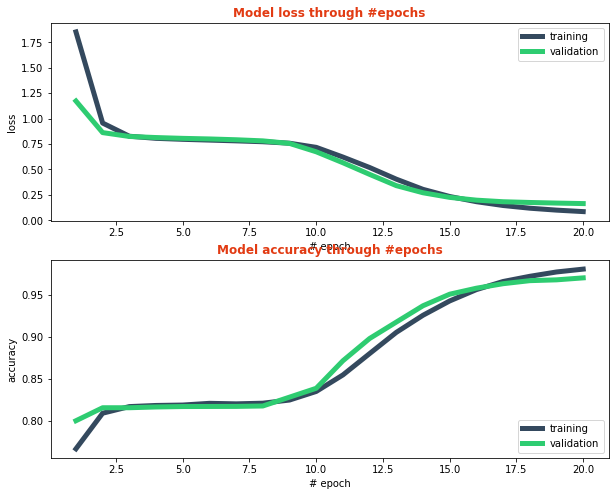

In [147]:
plot_model_performance(
    train_loss=model_hist.history.get('loss', []),
    train_acc=model_hist.history.get('crf_viterbi_accuracy', []),
    train_val_loss=model_hist.history.get('val_loss', []),
    train_val_acc=model_hist.history.get('val_crf_viterbi_accuracy', [])
)

## Función que Permite convertir Indices en Tags

In [0]:
#ESTA FUNCION RECIBE EN sequences LA LISTA DE ORACIONES DONDE CADA ELEMENTO DE LA ORACION ES UN ONE HOT VECTOR
def logits_to_tokens(sequences, index):
    token_sequences = []
    for categorical_sequence in sequences:
        token_sequence = []
        for categorical in categorical_sequence:
            token_sequence.append(index[np.argmax(categorical)])
 
        token_sequences.append(token_sequence)
 
    return token_sequences

## Hacemos la prediccion sobre el conjunto de pruebas. De la distribución probabilítica a etiquetas.

In [149]:
import pandas as pd

prediction = model.predict(test_sentences_X)
log_tokens = logits_to_tokens(prediction, {i: t for t, i in tag2index.items()})

print(log_tokens[0])

['cs', 'Fc', 'ncms000', 'cc', 'np0000p', 'rg', 'Fc', 'spcms', 'np0000o', 'Fc', 'sn.e-SUJ', 'van0000', 'rg', 'vmif3s0', 'sps00', 'cs', 'sn.e-SUJ', 'vsii3s0', 'sn.e-SUJ', 'vmip1s0', 'cs', 'vmp00sm', 'sps00', 'sn.e-SUJ', 'rn', 'vmip1s0', 'vmsp3s0', 'ncfs000', 'cs', 'vmii3s0', 'cs', 'sn.e-SUJ', 'pp3msa00', 'vaii3s0', 'vmp00sm', 'sps00', 'rg', 'Fp', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD

In [150]:
from sklearn.metrics import classification_report, confusion_matrix

results = pd.DataFrame(columns=['Expected', 'Predicted'])
k = 0
for i, lista_etiquetas_oracion in enumerate(test_tags):
    for j, etiquetas in enumerate(lista_etiquetas_oracion):
        k = k + 1
        results.loc[k, 'Expected'] = etiquetas
        results.loc[k, 'Predicted'] = log_tokens[i][j]

print(results)


print('\nclassification_report:\n', classification_report(results['Expected'], results['Predicted']))

       Expected Predicted
1            cs        cs
2            Fc        Fc
3       ncms000   ncms000
4            cc        cc
5      pn0ms000   np0000p
...         ...       ...
38477    da0ms0    da0ms0
38478   nccs000   nccs000
38479     sps00     sps00
38480   ncms000   ncms000
38481        Fp        Fp

[38481 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



classification_report:
               precision    recall  f1-score   support

       -PAD-       0.00      0.00      0.00         0
         Faa       0.00      0.00      0.00         3
         Fat       0.00      0.00      0.00         5
          Fc       1.00      1.00      1.00      2284
          Fd       0.87      0.99      0.92        87
          Fe       1.00      1.00      1.00       570
          Fg       0.95      1.00      0.97       222
          Fh       0.00      0.00      0.00         2
         Fia       0.00      0.00      0.00         8
         Fit       0.72      0.91      0.81        23
          Fp       1.00      1.00      1.00      1173
         Fpa       0.96      1.00      0.98       132
         Fpt       1.00      1.00      1.00       129
          Fs       0.00      0.00      0.00        14
          Fx       0.87      0.89      0.88        44
          Fz       0.00      0.00      0.00         3
           W       0.89      0.60      0.72       182
  

## PARTE 4 - Testing

### Creamos un pequeño Ejemplo

In [151]:
test_samples = [
    "Correr es importante para mi .".split(),
    "El hombre bajo corre bajo el puente con bajo indice de adrenalina .".split()
]
print(test_samples)

[['Correr', 'es', 'importante', 'para', 'mi', '.'], ['El', 'hombre', 'bajo', 'corre', 'bajo', 'el', 'puente', 'con', 'bajo', 'indice', 'de', 'adrenalina', '.']]


### Convertimos el texto en Una entrada para el Modelo y se generan los dos vecores de enteros de las dos oraciones

In [152]:
test_samples_X = []
for s in test_samples:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
    test_samples_X.append(s_int)

test_samples_X = pad_sequences(test_samples_X, maxlen=MAX_LENGTH, padding='post')
print(test_samples_X)
print(test_samples_X.shape)

[[ 1380  9907 20193 12473  4446  8499     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [  769 14539 19093 23095 19093   769  2616  5082 19093     1 24415     1
   84

### Se Ejecuta la predicion con la Entrada del modelo entrenado y el modelo de la red neuronal predice un matriz de 149 X 291 por cada oración. El shape de a predicción es (2, 149,291)

In [153]:
predictions = model.predict(test_samples_X)
print(predictions, predictions.shape)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]] (2, 149, 291)


### Conversion de la Salida del Modelo a un lista de Indices de Tags

In [154]:
log_tokens = logits_to_tokens(predictions, {i: t for t, i in tag2index.items()})
# JUS FOR CHECKING!!!! - IGNORE IT
ll = {i: t for t, i in tag2index.items()}
print(ll[np.argmax(predictions[0][0])])
####################
print(log_tokens)


vmn0000
[['vmn0000', 'vsip3s0', 'aq0cs0', 'sps00', 'aq0fsp', 'Fp', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-

### Presentación de los Resultados

In [155]:
#!pip install tabulate
from tabulate import tabulate

heads1 = test_samples[0]
body1 = [log_tokens[0][:len(test_samples[0])]]

heads2 = test_samples[1]
body2 = [log_tokens[1][:len(test_samples[1])]]

print(tabulate(body1, headers=heads1))
print ("\n")
print(tabulate(body2, headers=heads2))

print ("\n")

# print(goodPrint(heads2))
# print(body2)


## postagging Freeling 4.1

## El      hombre   bajo     corre    bajo  el      puente   con  bajo  índice   de  adrenalina  .
## DA0MS0  NCMS000  AQ0MS00  VMIP3S0  SP    DA0MS0  NCMS000  SP   SP    NCMS000  SP  NCFS000     Fp


## pos tagger Stanford NLP

## El      hombre   bajo     corre    bajo  el      puente   con    bajo   índice  de    adrenalina  .
## da0000  nc0s000  aq0000   vmip000  sp000 da0000  nc0s000  sp000  aq0000 nc0s000 sp000 nc0s000     fp

Correr    es       importante    para    mi      .
--------  -------  ------------  ------  ------  ---
vmn0000   vsip3s0  aq0cs0        sps00   aq0fsp  Fp


El      hombre    bajo    corre    bajo    el      puente    con    bajo    indice    de     adrenalina    .
------  --------  ------  -------  ------  ------  --------  -----  ------  --------  -----  ------------  ---
da0ms0  ncms000   sps00   vmip3s0  sps00   da0ms0  ncms000   sps00  sps00   ncms000   sps00  np0000o       Fp


